<a href="https://colab.research.google.com/github/divy042000/Machine-Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

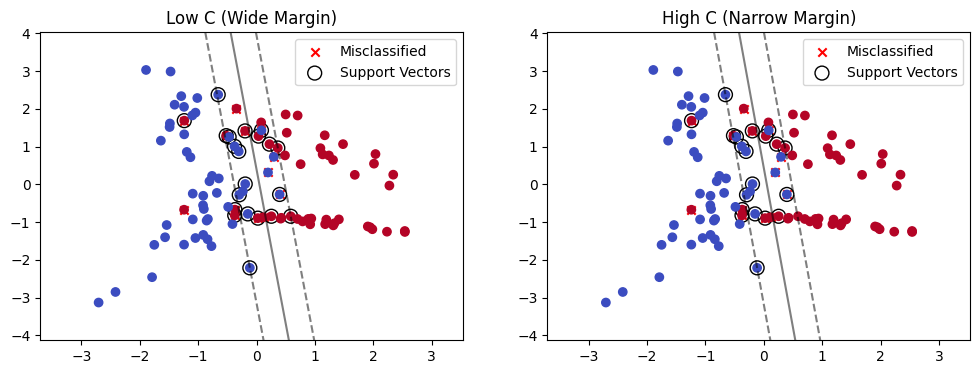


Misclassification Rate for Low C (Wide Margin): 25.00%


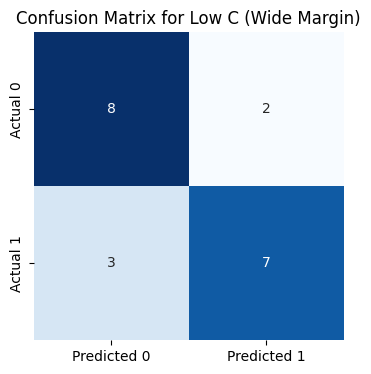


Misclassification Rate for High C (Narrow Margin): 25.00%


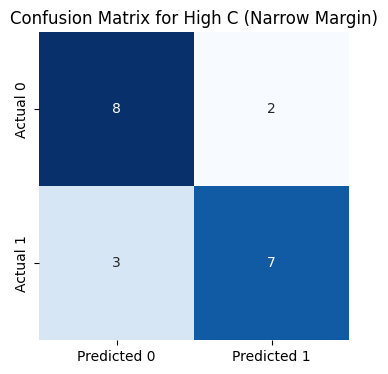

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Generate a synthetic dataset for illustration
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create SVM classifiers with different values of C
svm_low_c = SVC(C=10, kernel='linear')
svm_high_c = SVC(C=1000, kernel='linear')

# Fit the classifiers on the training data
svm_low_c.fit(X_train, y_train)
svm_high_c.fit(X_train, y_train)

# Function to plot decision boundaries, margins, and misclassified points
def plot_svm(clf, ax, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Get indices of misclassified points
    misclassified_indices = np.where(clf.predict(X) != y)[0]

    # Plot misclassified points with red crosses
    ax.scatter(X[misclassified_indices, 0], X[misclassified_indices, 1], marker='x', color='red', label='Misclassified')

    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)
    ax.legend()

    return scatter

# Plot decision boundaries, margins, and misclassified points for both classifiers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

scatter_low_c = plot_svm(svm_low_c, ax1, 'Low C (Wide Margin)')
scatter_high_c = plot_svm(svm_high_c, ax2, 'High C (Narrow Margin)')

plt.show()

# Evaluate and print misclassification rate for both classifiers
def evaluate_classifier(clf, X, y, label):
    y_pred = clf.predict(X)
    misclassification_rate = 1 - accuracy_score(y, y_pred)

    print(f'\nMisclassification Rate for {label}: {misclassification_rate:.2%}')

    # Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {label}')
    plt.show()

# Evaluate and print results for both classifiers using the test set
evaluate_classifier(svm_low_c, X_test, y_test, 'Low C (Wide Margin)')
evaluate_classifier(svm_high_c, X_test, y_test, 'High C (Narrow Margin)')
